<a href="https://colab.research.google.com/github/RomanKhaykichev/Python/blob/main/Python_Seminar_10_H_Task(graph).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import seaborn as sns
import pandas as pd
import numpy as nm

# Семинар 10 - Построение графиков

##*Задача 44*

* Создать новый столбец height_group в таблице с пингвинами, который будет отвечать за показатель длины клюва пингвина. high - высокий(от 42), middle - средний(от 35 до 42), low - низкий(до 35).

* Изобразить гистограмму по flipper_length_mm с оттенком height_group.

**Дополнительное:**
| Задание 44 |

В ячейке ниже представлен ```код``` генерирующий DataFrame, которая состоит всего из 1 столбца. Ваша задача перевести его в one hot вид. Сможете ли вы это сделать без get_dummies?

```import random
lst = ['robot'] * 10
lst += ['human'] * 10
random.shuffle(lst)
data = pd.DataFrame({'whoAmI'lst})
data.head() ```|

[Статья про one hot](https://colab.research.google.com/drive/1qKamnDiRmpRZkpiqWPkunBdAhmzhMcGz?usp=sharing)

Добавить one hot к изначальной таблице

In [2]:
# Подключение таблицы с пингвинами
penguins = sns.load_dataset("penguins")

In [3]:
# Создать новый столбец height_group в таблице с пингвинами, 
# который будет отвечать за показатель длины клюва пингвина.
# high - высокий(от 42), middle - средний(от 35 до 42), low - низкий(до 35).

penguins.loc[penguins['bill_length_mm']>42, 'height_group']='high'
penguins.loc[(penguins['bill_length_mm']>35) & (penguins['bill_length_mm']<42), 'height_group']='middle'
penguins.loc[penguins['bill_length_mm']<35, 'height_group']='low'
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,height_group
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,middle
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,middle
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,middle
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,middle


<Axes: xlabel='flipper_length_mm', ylabel='Count'>

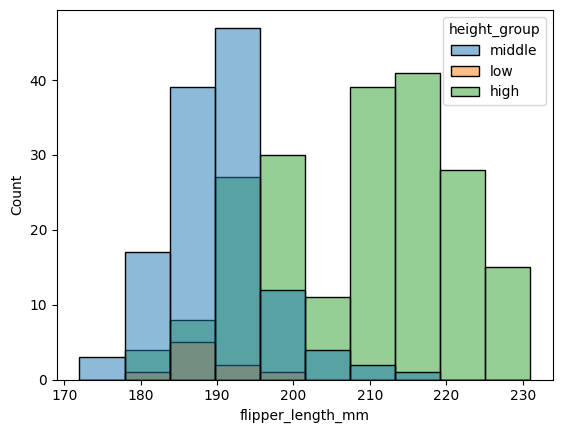

In [4]:
# Изобразить гистограмму по flipper_length_mm с оттенком height_group.
sns.histplot(data=penguins,x="flipper_length_mm",hue="height_group")

In [5]:
# Код генерирующий DataFrame
import random
lst = ['robot'] * 10
lst += ['human'] * 10
random.shuffle(lst)
data = pd.DataFrame({'whoAmI':lst})
data.head()

,whoAmI
0,robot
1,human
2,human
3,robot
4,robot


In [6]:
# one hot кодировка
pd.get_dummies(data)
data.head(n=10)

,whoAmI
0,robot
1,human
2,human
3,robot
4,robot
5,robot
6,human
7,robot
8,human
9,robot


In [7]:
# one hot кодировка без get_dummies
data.loc[data['whoAmI']=='human', 'WhoAmIRobot']='0'
data.loc[data['whoAmI']=='robot', 'WhoAmIRobot']='1'
data.loc[data['whoAmI']=='human', 'WhoAmIHuman']='1'
data.loc[data['whoAmI']=='robot', 'WhoAmIHuman']='0'
data[['WhoAmIHuman','WhoAmIRobot']]
data.head(n=10)

,whoAmI,WhoAmIRobot,WhoAmIHuman
0,robot,1,0
1,human,0,1
2,human,0,1
3,robot,1,0
4,robot,1,0
5,robot,1,0
6,human,0,1
7,robot,1,0
8,human,0,1
9,robot,1,0


In [8]:
# one hot кодировка - функция NumPy where()
data['WhoAmIRobot']=nm.where(data['whoAmI']=='robot','1','0')
data['WhoAmIHuman']=nm.where(data['whoAmI']=='human','1','0')
data.head(n=10)

,whoAmI,WhoAmIRobot,WhoAmIHuman
0,robot,1,0
1,human,0,1
2,human,0,1
3,robot,1,0
4,robot,1,0
5,robot,1,0
6,human,0,1
7,robot,1,0
8,human,0,1
9,robot,1,0


In [9]:
# Добавить one hot к изначальной таблице
penguins['high']=nm.where(penguins['height_group']=='high','1','0')
penguins['middle']=nm.where(penguins['height_group']=='middle','1','0')
penguins['low']=nm.where(penguins['height_group']=='low','1','0')
penguins[['height_group','high','middle','low']].drop_duplicates()

,height_group,high,middle,low
0,middle,0,1,0
3,NaN,0,0,0
8,low,0,0,1
17,high,1,0,0
